In [2]:
import pandas as pd
import numpy as np

df_30_748 = pd.read_csv('df_30k_7488features.csv', index_col=0, low_memory=False)

df_30_748.head()

,picturecount,pricetrend,livingSpace,baseRentRange,noRooms,noRoomsRange,livingSpaceRange,garden_False,garden_True,lift_False,...,geo_plz_99891,geo_plz_99894,geo_plz_99897,geo_plz_99898,geo_plz_99947,geo_plz_99974,geo_plz_99976,geo_plz_99991,geo_plz_99994,totalRent
serviceCharge,,,,,,,,,,,,,,,,,,,,,
140.0,11,3.40,90.0,3,3,3,4,0,1,1,...,0,0,0,0,0,0,0,0,0,590.0
110.0,14,5.05,36.0,3,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,609.0
130.0,8,2.53,56.1,3,2,2,2,1,0,1,...,0,0,0,0,0,0,0,0,0,607.0
150.0,6,3.26,56.0,2,2,2,2,1,0,1,...,0,0,0,0,0,0,0,0,0,500.0
140.0,7,3.33,143.0,5,5,5,6,0,1,1,...,0,0,0,0,0,0,0,0,0,890.0


In [3]:
df_30_152 = pd.read_csv('152features\df_30k_152features.csv', index_col=0, low_memory=False) 
df_90_152 = pd.read_csv('152features\df_90k_152features.csv', index_col=0, low_memory=False) 
df_176_152 = pd.read_csv('152features\df_176k_152features.csv', index_col=0, low_memory=False) 


In [42]:
df_30_748.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 30000 entries, 140.0 to 145.0
Columns: 7488 entries, picturecount to totalRent
dtypes: float64(3), int64(7485)
memory usage: 1.7 GB


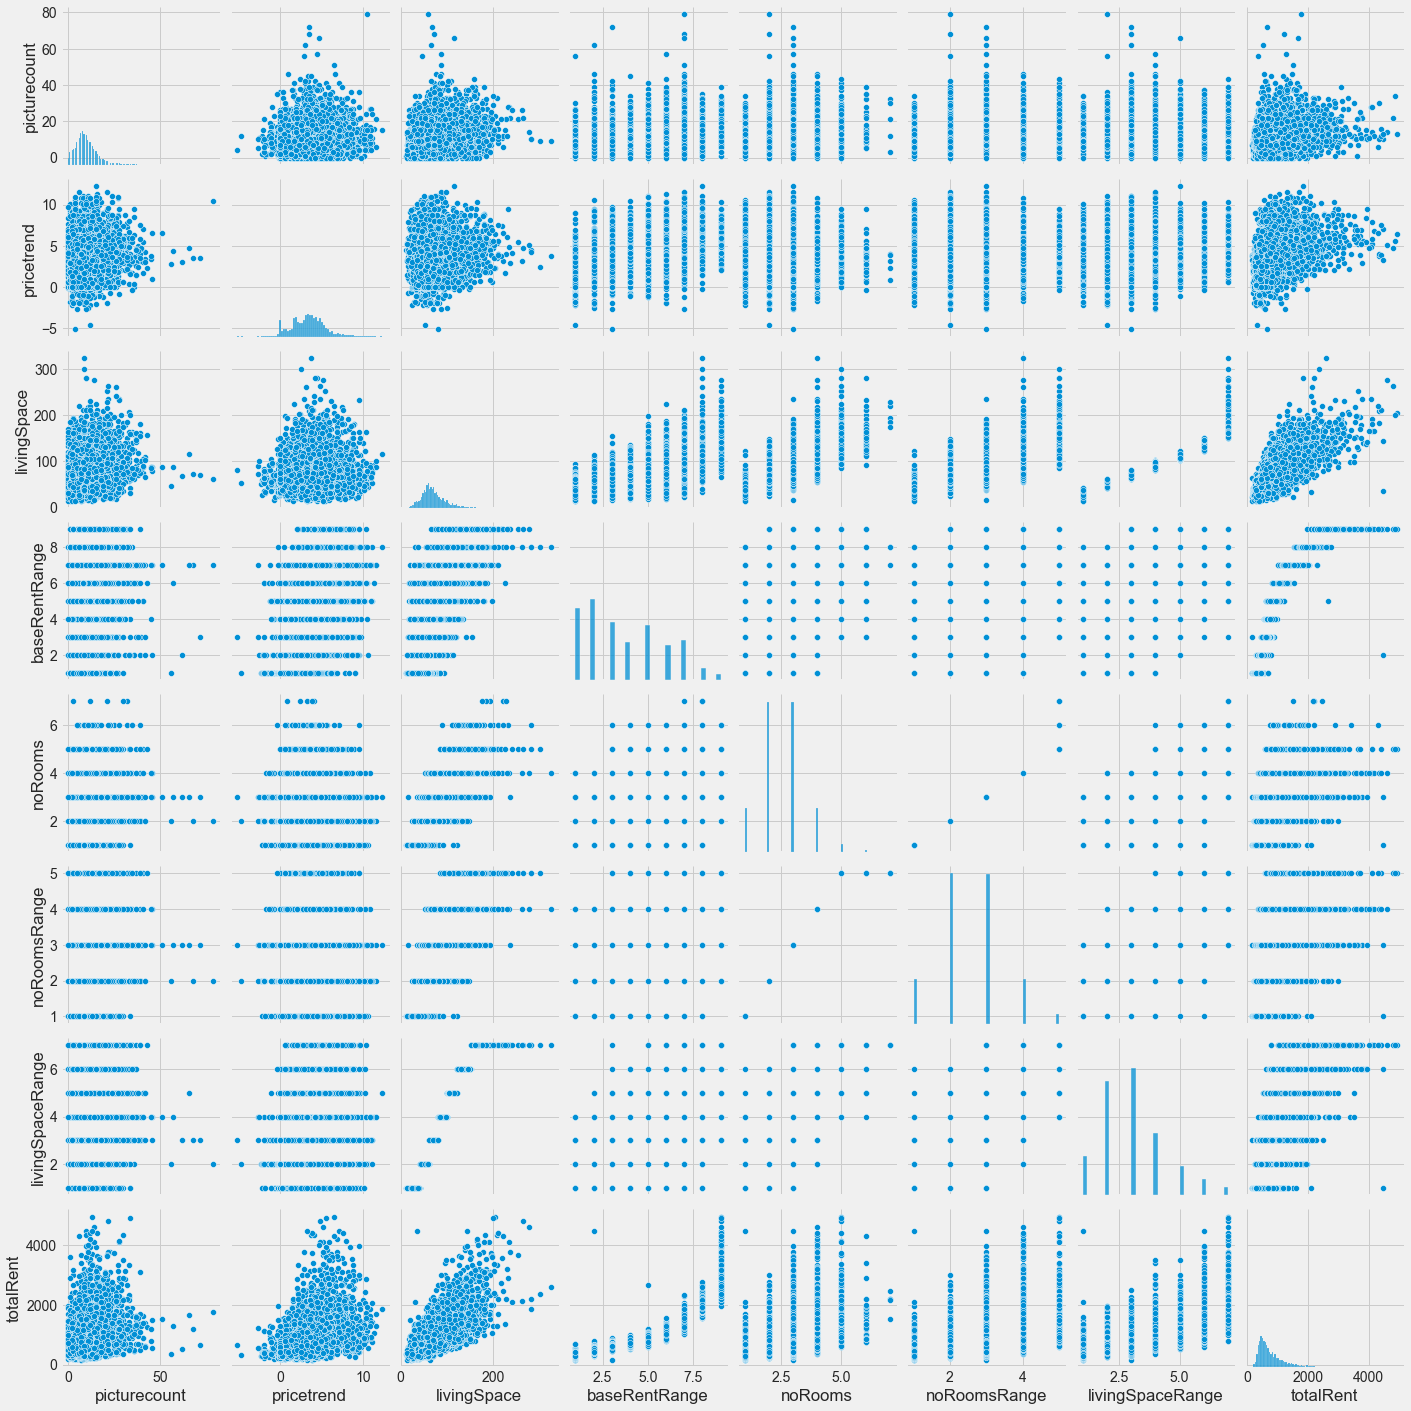

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

sns.pairplot(df)


In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# Random Forest Regressor df_30_748

In [48]:
df_30_748 = pd.read_csv('df_30k_7488features.csv', index_col=0, low_memory=False)

In [52]:
# Assigning X to age and size and Y to price

X = df_30_748.drop(columns=['totalRent'])
Y = df_30_748.totalRent
Y = np.array(Y).reshape(-1)
print(X.shape,Y.shape)

(30000, 7487) (30000,)


In [53]:
# Splitting the data with 80:20 ratio

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = .20, random_state = 40)
X_train.shape, X_test.shape

((24000, 7487), (6000, 7487))

In [49]:
# Estimate the best hyperparameter combination using RandomizedSearchCV

#model_rf = RandomForestRegressor(n_estimators=30, oob_score=True, random_state=40)
model_rf = RandomForestRegressor(random_state = 1)

rfr_random = RandomizedSearchCV(estimator=model_rf, 
                                param_distributions=grid_param, 
                                n_iter = 20, 
                                scoring='neg_mean_absolute_error', 
                                cv = 3, verbose=5, 
                                random_state=1, 
                                n_jobs=-1, 
                                return_train_score=False)

#rfr_random.fit(X_train, y_train);

In [50]:
rfr_random.fit(X_train, y_train)
print(rfr_random.best_params_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'n_estimators': 60, 'min_samples_split': 7, 'min_samples_leaf': 5, 'max_depth': 50}


In [55]:
%%time
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt



#model_rf = RandomForestRegressor(n_estimators=30, oob_score=True, random_state=40)
model_rf = RandomForestRegressor(n_estimators=60, max_depth = 50, min_samples_split = 7, min_samples_leaf = 5, random_state=0, n_jobs = -1)

#{'n_estimators': 60, 'min_samples_split': 7, 'min_samples_leaf': 5, 'max_depth': 50}

model_rf.fit(X_train, y_train) 
pred_train_rf= model_rf.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rf)))
print(r2_score(y_train, pred_train_rf))



74.59163546839434
0.9772539871792606
Wall time: 43.4 s


In [56]:
pred_test_rf = model_rf.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rf)))
print(r2_score(y_test, pred_test_rf))

108.7595243328879
0.9534102775304811


In [ ]:
(n_estimators=30, max_depth = 10, min_samples_split = 7, min_samples_leaf = 3, random_state=0, n_jobs = -1)
(n_estimators=60, max_depth = 30, min_samples_split = 10, min_samples_leaf = 5, random_state=0, n_jobs = -1)
(n_estimators=100, max_depth = 50, min_samples_split = 12, min_samples_leaf = 7, random_state=0, n_jobs = -1)
(n_estimators=200, max_depth = 80, min_samples_split = 16, min_samples_leaf = 9, random_state=0, n_jobs = -1)


# Random Forest Regressor df_30_152

In [57]:
df_30_152 = pd.read_csv('152features\df_30k_152features.csv', index_col=0, low_memory=False) 


In [58]:
# Assigning X to age and size and Y to price

X = df_30_152.drop(columns=['totalRent'])
Y = df_30_152.totalRent
Y = np.array(Y).reshape(-1)
print(X.shape,Y.shape)

(30000, 151) (30000,)


In [59]:
# Splitting the data with 80:20 ratio

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = .20, random_state = 40)
X_train.shape, X_test.shape

((24000, 151), (6000, 151))

In [60]:
# Estimate the best hyperparameter combination using RandomizedSearchCV

#model_rf = RandomForestRegressor(n_estimators=30, oob_score=True, random_state=40)
model_rf = RandomForestRegressor(random_state = 1)

rfr_random = RandomizedSearchCV(estimator=model_rf, 
                                param_distributions=grid_param, 
                                n_iter = 20, 
                                scoring='neg_mean_absolute_error', 
                                cv = 3, verbose=5, 
                                random_state=1, 
                                n_jobs=-1, 
                                return_train_score=False)

#rfr_random.fit(X_train, y_train);

In [61]:
rfr_random.fit(X_train, y_train)
print(rfr_random.best_params_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'n_estimators': 200, 'min_samples_split': 7, 'min_samples_leaf': 7, 'max_depth': 50}


In [66]:
%%time
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt



#model_rf = RandomForestRegressor(n_estimators=30, oob_score=True, random_state=40)
model_rf = RandomForestRegressor(n_estimators=200, max_depth = 50, min_samples_split = 7, min_samples_leaf = 7, random_state=0, n_jobs = -1)

#{'n_estimators': 200, 'min_samples_split': 7, 'min_samples_leaf': 7, 'max_depth': 50}

model_rf.fit(X_train, y_train) 
pred_train_rf= model_rf.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rf)))
print(r2_score(y_train, pred_train_rf))


82.24073175731597
0.971789021193578
Wall time: 5.34 s


In [67]:
pred_test_rf = model_rf.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rf)))
print(r2_score(y_test, pred_test_rf))

108.34962150972993
0.9554659201082036


In [ ]:
(n_estimators=30, max_depth = 10, min_samples_split = 7, min_samples_leaf = 3, random_state=0, n_jobs = -1)
(n_estimators=60, max_depth = 30, min_samples_split = 10, min_samples_leaf = 5, random_state=0, n_jobs = -1)
(n_estimators=100, max_depth = 50, min_samples_split = 12, min_samples_leaf = 7, random_state=0, n_jobs = -1)
(n_estimators=200, max_depth = 80, min_samples_split = 16, min_samples_leaf = 9, random_state=0, n_jobs = -1)


# Random Forest Regressor df_90_152

In [68]:
df_90_152 = pd.read_csv('152features\df_90k_152features.csv', index_col=0, low_memory=False) 


In [69]:
# Assigning X to age and size and Y to price

X = df_90_152.drop(columns=['totalRent'])
Y = df_90_152.totalRent
Y = np.array(Y).reshape(-1)
print(X.shape,Y.shape)

(90000, 151) (90000,)


In [70]:
# Splitting the data with 80:20 ratio

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = .20, random_state = 40)
X_train.shape, X_test.shape

((72000, 151), (18000, 151))

In [71]:
# Estimate the best hyperparameter combination using RandomizedSearchCV

#model_rf = RandomForestRegressor(n_estimators=30, oob_score=True, random_state=40)
model_rf = RandomForestRegressor(random_state = 1)

rfr_random = RandomizedSearchCV(estimator=model_rf, 
                                param_distributions=grid_param, 
                                n_iter = 20, 
                                scoring='neg_mean_absolute_error', 
                                cv = 3, verbose=5, 
                                random_state=1, 
                                n_jobs=-1, 
                                return_train_score=False)

#rfr_random.fit(X_train, y_train);

In [72]:
rfr_random.fit(X_train, y_train)
print(rfr_random.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'n_estimators': 200, 'min_samples_split': 7, 'min_samples_leaf': 7, 'max_depth': 50}


In [75]:
%%time
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt



#model_rf = RandomForestRegressor(n_estimators=30, oob_score=True, random_state=40)

model_rf = RandomForestRegressor(n_estimators=200, max_depth = 50, min_samples_split = 7, min_samples_leaf = 7, random_state=0, n_jobs = -1)

#{'n_estimators': 200, 'min_samples_split': 7, 'min_samples_leaf': 7, 'max_depth': 50}


model_rf.fit(X_train, y_train) 
pred_train_rf= model_rf.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rf)))
print(r2_score(y_train, pred_train_rf))


82.89377395488165
0.9726927956290569
Wall time: 31.5 s


In [76]:
pred_test_rf = model_rf.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rf)))
print(r2_score(y_test, pred_test_rf))

105.38589432342431
0.9569916339181999


# Random Forest Regressor df_176_152

In [77]:
df_176_152 = pd.read_csv('152features\df_176k_152features.csv', index_col=0, low_memory=False) 

In [78]:
# Assigning X to age and size and Y to price

X = df_176_152.drop(columns=['totalRent'])
Y = df_176_152.totalRent
Y = np.array(Y).reshape(-1)
print(X.shape,Y.shape)

(176285, 151) (176285,)


In [79]:
# Splitting the data with 80:20 ratio

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = .20, random_state = 40)
X_train.shape, X_test.shape

((141028, 151), (35257, 151))

In [80]:
#model_rf = RandomForestRegressor(n_estimators=30, oob_score=True, random_state=40)
model_rf = RandomForestRegressor(random_state = 1)


rfr_random = RandomizedSearchCV(estimator=model_rf, 
                                param_distributions=grid_param, 
                                n_iter = 20, 
                                scoring='neg_mean_absolute_error', 
                                cv = 3, verbose=5, 
                                random_state=1, 
                                n_jobs=-1, 
                                return_train_score=False)

#rfr_random.fit(X_train, y_train);

In [81]:
rfr_random.fit(X_train, y_train)
print(rfr_random.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'n_estimators': 60, 'min_samples_split': 7, 'min_samples_leaf': 5, 'max_depth': 50}


In [82]:
%%time
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt



#model_rf = RandomForestRegressor(n_estimators=30, oob_score=True, random_state=40)
#model_rf = RandomForestRegressor(n_estimators=200, max_depth = 80, min_samples_split = 16, min_samples_leaf = 9, random_state=0, n_jobs = -1)

model_rf = RandomForestRegressor(n_estimators=60, max_depth = 50, min_samples_split = 7, min_samples_leaf = 5, random_state=0, n_jobs = -1)
#best for df_176_152 {'n_estimators': 60, 'min_samples_split': 7, 'min_samples_leaf': 5, 'max_depth': 50}

model_rf.fit(X_train, y_train) 
pred_train_rf= model_rf.predict(X_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rf)))
print(r2_score(y_train, pred_train_rf))


75.31211527852894
0.9775491662711513
Wall time: 26.5 s


In [83]:
pred_test_rf = model_rf.predict(X_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rf)))
print(r2_score(y_test, pred_test_rf))

101.07387310518193
0.9596839465901308


In [ ]:
(n_estimators=30, max_depth = 10, min_samples_split = 7, min_samples_leaf = 3, random_state=0, n_jobs = -1)
(n_estimators=60, max_depth = 30, min_samples_split = 10, min_samples_leaf = 5, random_state=0, n_jobs = -1)
(n_estimators=100, max_depth = 50, min_samples_split = 12, min_samples_leaf = 7, random_state=0, n_jobs = -1)
(n_estimators=200, max_depth = 80, min_samples_split = 16, min_samples_leaf = 9, random_state=0, n_jobs = -1)


# Best Choice Hyperparameter combination RandomizedSearchCV

In [80]:
#number of trees 
n_estimators = [30,60,100,200]
#max number of levels in tree
max_depth = [10,30,50,80]
#minimum number of samples required to split a node
min_samples_split = [7,10,12,16]
#minimun number of samples required at each leaf node 
min_samples_leaf = [3,5,7,9]


In [24]:
grid_param = {'n_estimators': [30,60,100,200],
             'max_depth': [10,30,50,80],
             'min_samples_leaf': [3,5,7,9],
             'min_samples_split': [7,10,12,16]}

In [45]:
#%%time
from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt



#model_rf = RandomForestRegressor(n_estimators=30, oob_score=True, random_state=40)
model_rf = RandomForestRegressor(random_state = 1)


rfr_random = RandomizedSearchCV(estimator=model_rf, 
                                param_distributions=grid_param, 
                                n_iter = 20, 
                                scoring='neg_mean_absolute_error', 
                                cv = 3, verbose=5, 
                                random_state=1, 
                                n_jobs=-1, 
                                return_train_score=False)

#rfr_random.fit(X_train, y_train);

In [46]:
rfr_random.fit(X_train, y_train)
print(rfr_random.best_params_)



Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'n_estimators': 60, 'min_samples_split': 7, 'min_samples_leaf': 5, 'max_depth': 50}


In [84]:

import matplotlib.pyplot as plt
import numpy as np
import PIL
import pydotplus
import warnings
from glob import glob
from IPython.display import display, Image
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz

ModuleNotFoundError: No module named 'pydotplus'

In [ ]:

%matplotlib inline
warnings.filterwarnings("ignore")

In [ ]:

def save_decision_trees_as_png(clf, iteration, feature_name, target_name):
    file_name = "iris_" + str(iteration) + ".png"
    dot_data = export_graphviz(
        clf,
        out_file=None,
        feature_names=feature_name,
        class_names=target_name,
        rounded=True,
        proportion=False,
        precision=2,
        filled=True,
    )
    graph = pydotplus.graph_from_dot_data(dot_data)
    graph.write_png(file_name)
    print("Decision Tree {} saved as png file".format(iteration + 1))

In [ ]:

model = RandomForestClassifier(n_estimators=5)
model.fit(iris.data, iris.target)